# TD 1

On définit le générateur de mauvaise qualité comme suit :

\begin{equation*}
u^*_{n+1}=5 u^*_n + 1 \, \operatorname{mod} 65536 \quad u_n=u^*_n/65536
\end{equation*}


On commence par préparer les packages dont on aura besoin.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time as time
from collections import Counter
from scipy.stats import chi2, norm
import pandas as pd

## Exercice 1


On commence par définir notre mauvais générateur.

In [2]:
def u(n: int) -> np.ndarray[np.uint16]:
    u_star: np.ndarray = np.empty(n, dtype=np.uint16)
    u_star[0] = 0
    for i in range(1, n):
        u_star[i] = np.uint16(5 * u_star[i - 1] + 1)
    return u_star/65536

In [3]:
def tirages(seed: int, n: int) -> np.ndarray[np.float64]:
    return u(n + seed)[seed:n + seed + 1]

In [4]:
print(tirages(0, 10))

[0.00000000e+00 1.52587891e-05 9.15527344e-05 4.73022461e-04
 2.38037109e-03 1.19171143e-02 5.96008301e-02 2.98019409e-01
 4.90112305e-01 4.50576782e-01]


/tmp/ipykernel_14418/175185864.py:5: RuntimeWarning: overflow encountered in scalar multiply
  u_star[i] = np.uint16(5 * u_star[i - 1] + 1)


Pour faire en sorte que les nombres tirés changent à chaque éxécution on modifie la seed.

In [5]:
print(tirages(int((time.time() - int(time.time())) * 100), 10))

[0.14183044 0.70916748 0.54585266 0.72927856 0.64640808 0.23205566
 0.16029358 0.80148315 0.00743103 0.03717041]


/tmp/ipykernel_14418/175185864.py:5: RuntimeWarning: overflow encountered in scalar multiply
  u_star[i] = np.uint16(5 * u_star[i - 1] + 1)


Pour le bon générateur :

In [6]:
print(np.random.rand(10))

np.random.seed(42)

print(np.random.rand(10))

np.random.seed(None)

[0.81672101 0.63509246 0.54361044 0.27856691 0.51822414 0.06362912
 0.90120206 0.72983494 0.78349805 0.89465474]
[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258]


## Exercice 2

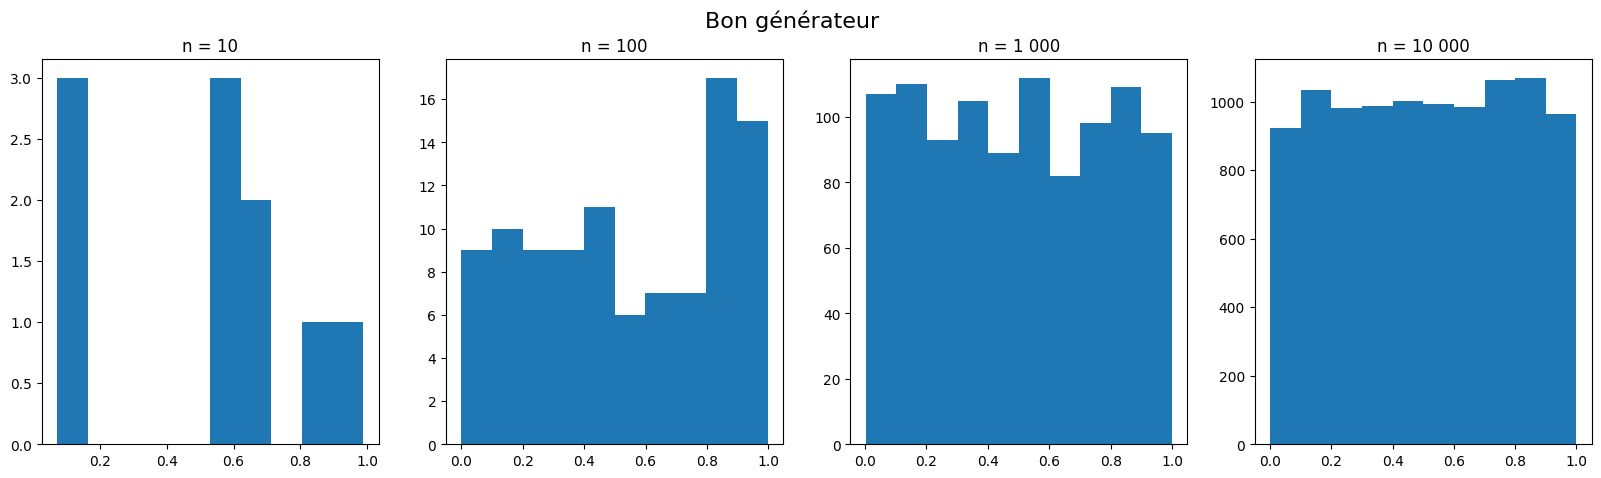

In [7]:
plt.figure(figsize=(20, 5))

plt.suptitle('Bon générateur',fontsize=16)

plt.subplot(1, 4, 1)
plt.hist(np.random.uniform(0, 1, 10))
plt.title('n = 10')

plt.subplot(1, 4, 2)
plt.hist(np.random.uniform(0, 1, 100))
plt.title('n = 100')

plt.subplot(1, 4, 3)
plt.hist(np.random.uniform(0, 1, 1000))
plt.title('n = 1 000')

plt.subplot(1, 4, 4)
plt.hist(np.random.uniform(0, 1, 10000))
plt.title('n = 10 000')

plt.show()

/tmp/ipykernel_14418/175185864.py:5: RuntimeWarning: overflow encountered in scalar multiply
  u_star[i] = np.uint16(5 * u_star[i - 1] + 1)


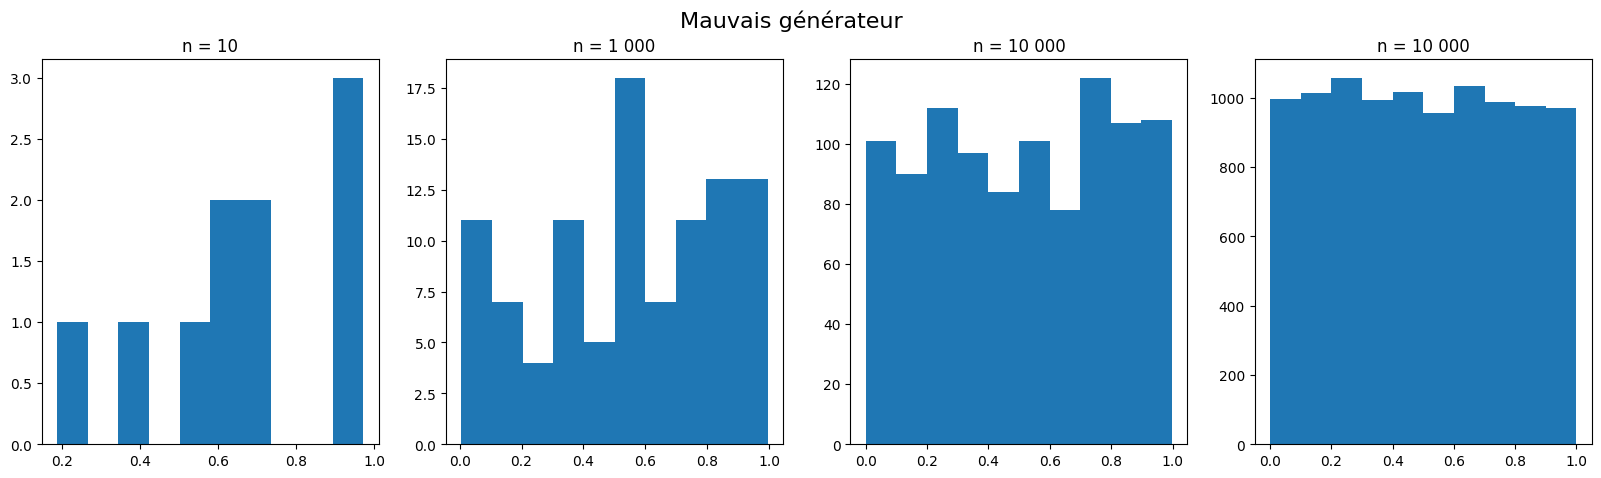

In [8]:
plt.figure(figsize=(20, 5))

plt.suptitle('Mauvais générateur',fontsize=16)

plt.subplot(1, 4, 1)
plt.hist(tirages(100, 10))
plt.title('n = 10')

plt.subplot(1, 4, 2)
plt.hist(tirages(100, 100))
plt.title('n = 1 000')

plt.subplot(1, 4, 3)
plt.hist(tirages(100, 1_000))
plt.title('n = 10 000')

plt.subplot(1, 4, 4)
plt.hist(tirages(100, 10_000))
plt.title('n = 10 000')

plt.show()

In [9]:
def dist(X: np.ndarray, bins: int) -> np.float64:
    counts:np.ndarray[int]
    counts, _ = np.histogram(X)
    diff: np.float64 = np.sum(np.abs(np.array(counts) - bins/len(counts)))
    return diff

In [10]:
dist(tirages(10, 10_000), 10)

/tmp/ipykernel_14418/175185864.py:5: RuntimeWarning: overflow encountered in scalar multiply
  u_star[i] = np.uint16(5 * u_star[i - 1] + 1)


np.float64(9990.0)

In [11]:
def dist(X, bins=10):
    n = len(X)
    o, _ = np.histogram(X, bins = bins, range = (0,1))
    e = n / bins

    dist = np.sum((o - e)**2 / e)
    p_value = 1 - chi2.cdf(dist, df= bins - 1)

    return dist, p_value

In [12]:
print(dist(tirages(100, 100_000)))

/tmp/ipykernel_14418/175185864.py:5: RuntimeWarning: overflow encountered in scalar multiply
  u_star[i] = np.uint16(5 * u_star[i - 1] + 1)
/tmp/ipykernel_14418/175185864.py:5: RuntimeWarning: overflow encountered in scalar add
  u_star[i] = np.uint16(5 * u_star[i - 1] + 1)


(np.float64(1.496), np.float64(0.9971763350627759))


## Exercice 3

/tmp/ipykernel_14418/175185864.py:5: RuntimeWarning: overflow encountered in scalar multiply
  u_star[i] = np.uint16(5 * u_star[i - 1] + 1)


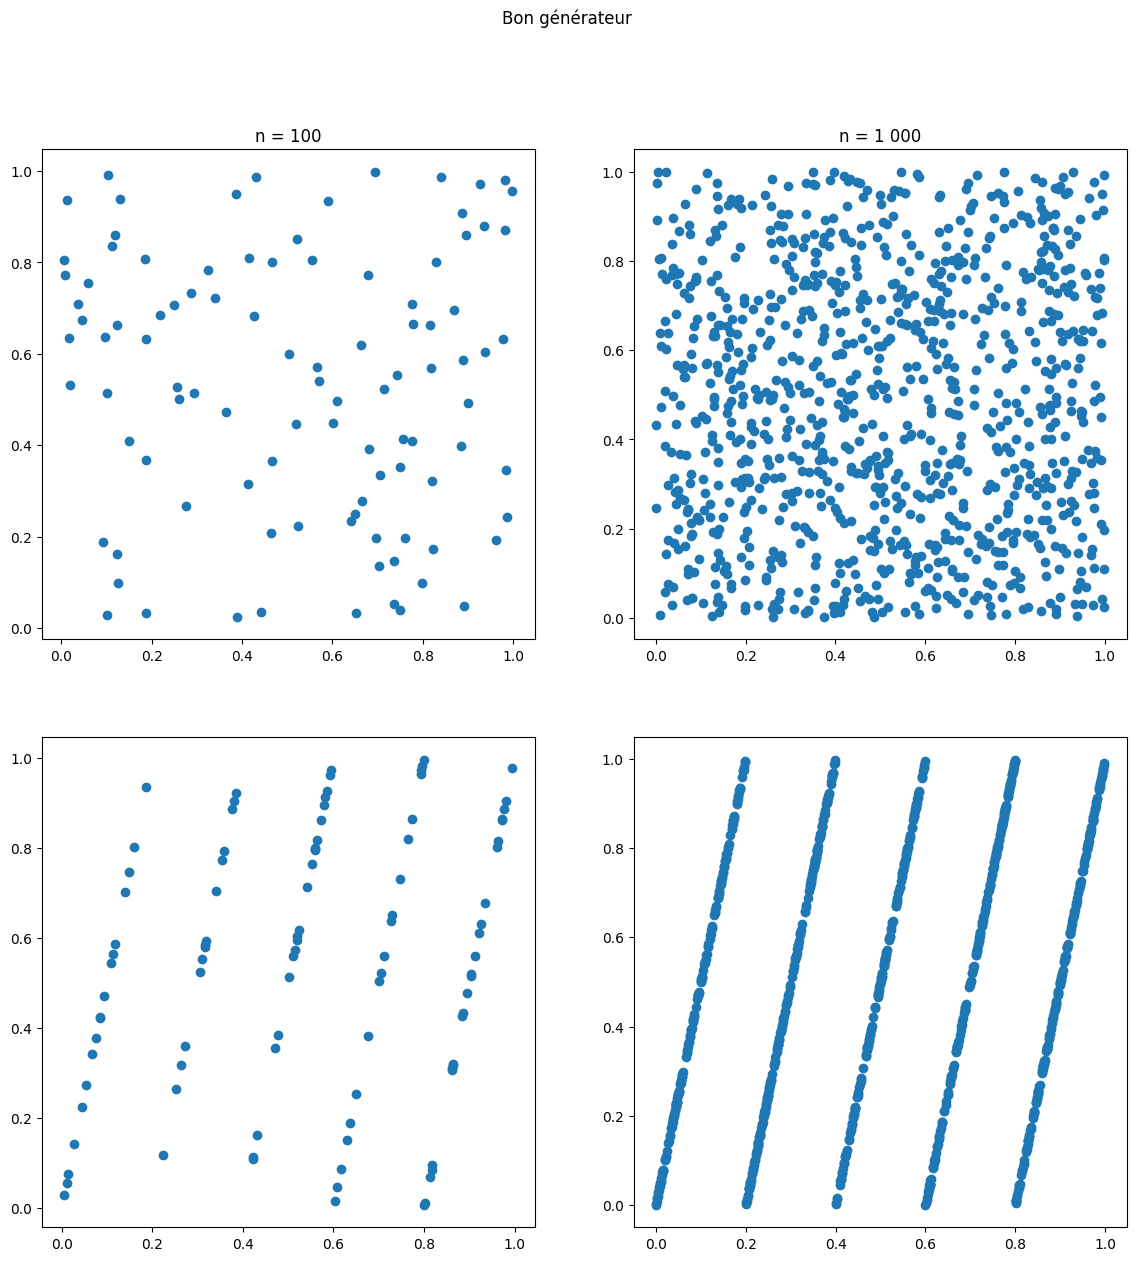

In [13]:
plt.figure(figsize=(14, 14))

plt.suptitle('Bon générateur')

plt.subplot(2, 2, 1)
X = np.random.uniform(0, 1, 100)
Y = np.random.uniform(0, 1, 100)
plt.scatter(X, Y)
plt.title('n = 100')

plt.subplot(2, 2, 2)
X = np.random.uniform(0, 1, 1_000)
Y = np.random.uniform(0, 1, 1_000)
plt.scatter(X, Y)
plt.title('n = 1 000')

plt.subplot(2, 2, 3)
X = tirages(100, 101)
X = pd.Series(X)
Y = X.shift(-1)[0:100]
X = X[0:100]
plt.scatter(X, Y)

plt.subplot(2, 2, 4)
X = tirages(100, 1_001)
X = pd.Series(X)
Y = X.shift(-1)[0:1_000]
X = X[0:1_000]
plt.scatter(X, Y)

/tmp/ipykernel_14418/175185864.py:5: RuntimeWarning: overflow encountered in scalar multiply
  u_star[i] = np.uint16(5 * u_star[i - 1] + 1)


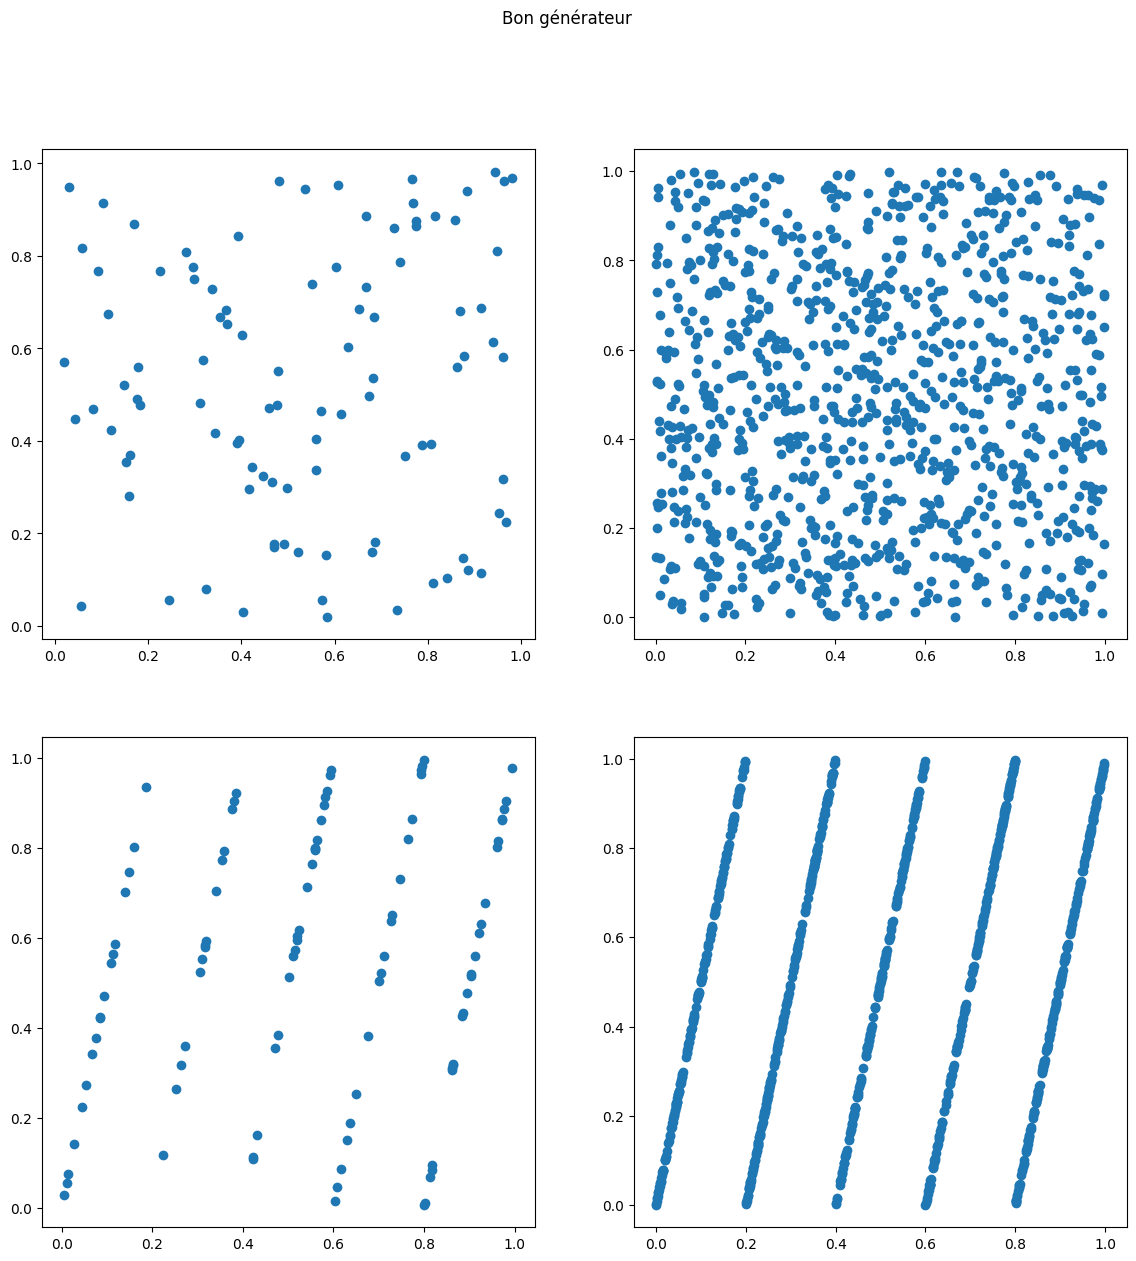

In [14]:
plt.figure(figsize=(14, 14))

plt.suptitle('Bon générateur')

plt.subplot(2, 2, 1)
X = np.random.uniform(0, 1, 101)
X = pd.Series(X)
Y = X.shift(-1)[0:100]
X = X[0:100]
plt.scatter(X, Y)

plt.subplot(2, 2, 2)
X = np.random.uniform(0, 1, 1_001)
X = pd.Series(X)
Y = X.shift(-1)[0:1_000]
X = X[0:1_000]
plt.scatter(X, Y)


plt.subplot(2, 2, 3)
X = tirages(100, 101)
X = pd.Series(X)
Y = X.shift(-1)[0:100]
X = X[0:100]
plt.scatter(X, Y)

plt.subplot(2, 2, 4)
X = tirages(100, 1_001)
X = pd.Series(X)
Y = X.shift(-1)[0:1_000]
X = X[0:1_000]
plt.scatter(X, Y)

## Exercice 4

D'après la LFGN on a :
\begin{equation*}
m_n = \frac1n \sum_{k=1}^n U_k \xrightarrow[n\to+\infty]{p.s.} \frac12
\end{equation*}

In [15]:
def m(n):
    X = np.random.uniform(0, 1, n)
    return np.cumsum(X)/ np.arange(1, n + 1)

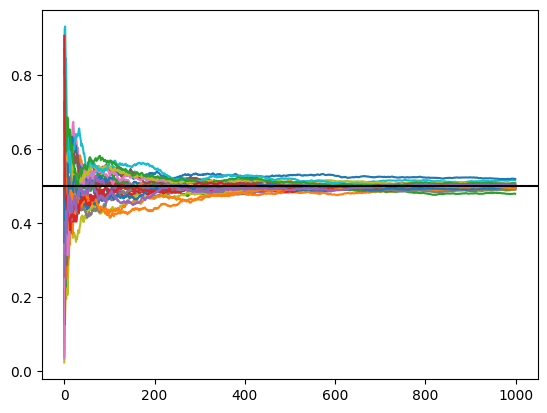

In [16]:
simulations = [m(1_000) for _ in range(25)]

simulations = pd.DataFrame(simulations).transpose()

simulations.plot(legend=False)
plt.axhline(y=.5, color='black')

In [17]:
def bad_m(n):
    X = tirages(np.random.randint(1, 65536), n)
    return np.cumsum(X) / np.arange(1, n + 1)

/tmp/ipykernel_14418/175185864.py:5: RuntimeWarning: overflow encountered in scalar multiply
  u_star[i] = np.uint16(5 * u_star[i - 1] + 1)


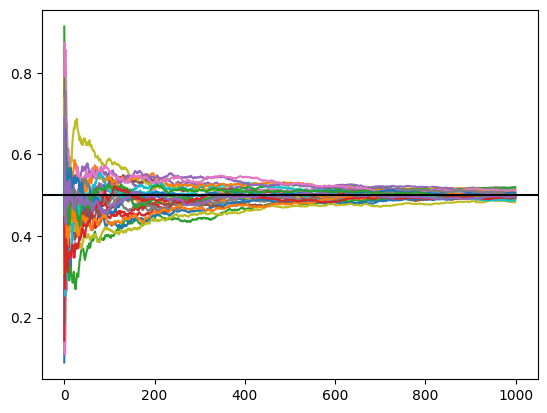

In [18]:
simulations = [bad_m(1_000) for _ in range(25)]

simulations = pd.DataFrame(simulations).transpose()

simulations.plot(legend=False)
plt.axhline(y=.5, color='black')

D'après le TCL on a

\begin{equation*}
\sqrt{12n}\left(m_n-\frac12\right) \sim \mathcal{N}(0,~1)
\end{equation*}

Et donc on en déduit

\begin{align*}
\mathbb{P}\left(-z \le \sqrt{12n}\left(m_n-\frac12\right) \le z\right) &= 0.95\\
\mathbb{P}\left(\frac12 - \frac{z}{\sqrt{12n}} \le m_n \le \frac12 + \frac{z}{\sqrt{12n}}\right) &= 0.95
\end{align*}

Avec $z\approx 1.96$ le quantile d'ordre 0.975 de $\mathcal{N}(0,1)$

/tmp/ipykernel_14418/175185864.py:5: RuntimeWarning: overflow encountered in scalar multiply
  u_star[i] = np.uint16(5 * u_star[i - 1] + 1)
/tmp/ipykernel_14418/175185864.py:5: RuntimeWarning: overflow encountered in scalar add
  u_star[i] = np.uint16(5 * u_star[i - 1] + 1)


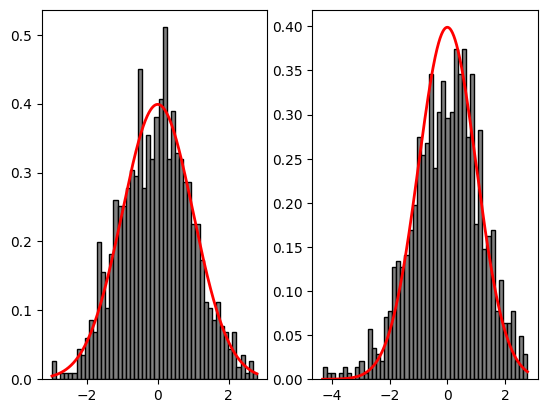

In [19]:
test_good = [np.sqrt(12*1_000)*(m(1_000)[-1] - 0.5) for _ in range(1_000)]
test_bad = [np.sqrt(12*1_000)*(bad_m(1_000)[-1] - 0.5) for _ in range(1_000)]

plt.subplot(1, 2, 1)
plt.hist(test_good, bins=50, color='grey', edgecolor='black', density=True)
plt.plot(np.linspace(min(test_good), max(test_good), 1000), norm.pdf(np.linspace(min(test_good), max(test_good), 1000), loc=0, scale=1), 'r-', linewidth=2, label='Distribution théorique')

plt.subplot(1, 2, 2)
plt.hist(test_bad, bins=50, color='grey', edgecolor='black', density=True)
plt.plot(np.linspace(min(test_bad), max(test_bad), 1000), norm.pdf(np.linspace(min(test_bad), max(test_bad), 1000), loc=0, scale=1), 'r-', linewidth=2, label='Distribution théorique')

plt.show()

In [20]:
def conf(n):
    return 0.5 - 1.96/(np.sqrt(12*n)), 0.5 + 1.96/(np.sqrt(12*n))

In [21]:
n = 10_000
s = 100

a, b = conf(n)
c_bad = 0
c_good = 0
X = [bad_m(n)[-1] for _ in range(s)]
Y = [m(n)[-1] for _ in range(s)]

for k in X:
    if a <= k <= b:
        c_bad+=1

for k in Y:
    if a <= k <= b:
        c_good += 1

print(c_bad/s, c_good/s)

/tmp/ipykernel_14418/175185864.py:5: RuntimeWarning: overflow encountered in scalar multiply
  u_star[i] = np.uint16(5 * u_star[i - 1] + 1)
/tmp/ipykernel_14418/175185864.py:5: RuntimeWarning: overflow encountered in scalar add
  u_star[i] = np.uint16(5 * u_star[i - 1] + 1)


0.91 0.96


In [34]:
def kth(x, k):
    return int((x * 10**k) % 10)

/tmp/ipykernel_14418/175185864.py:5: RuntimeWarning: overflow encountered in scalar multiply
  u_star[i] = np.uint16(5 * u_star[i - 1] + 1)


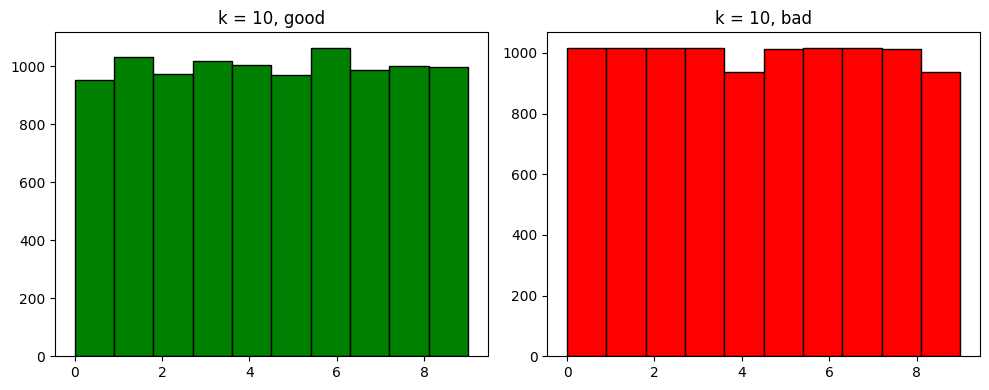

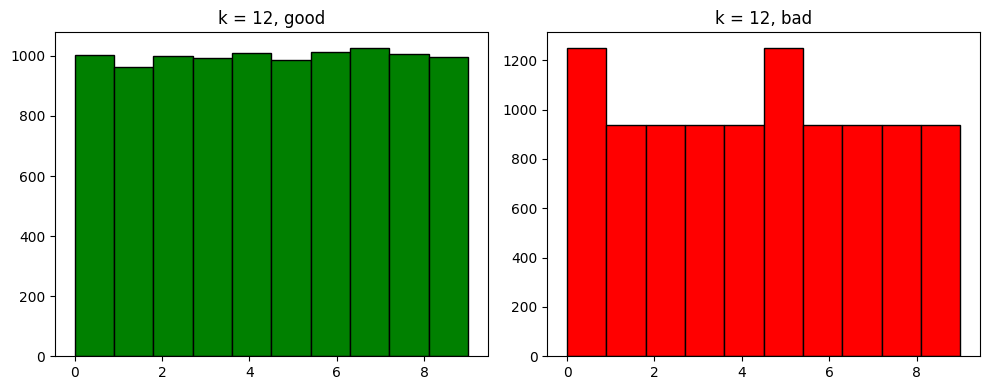

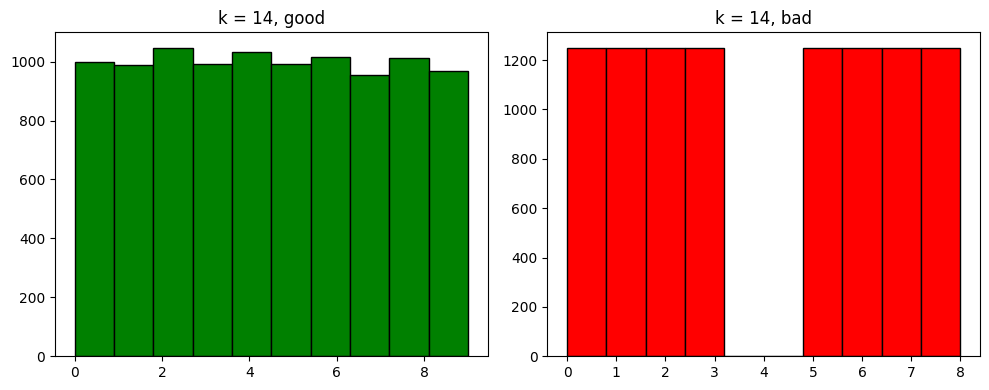

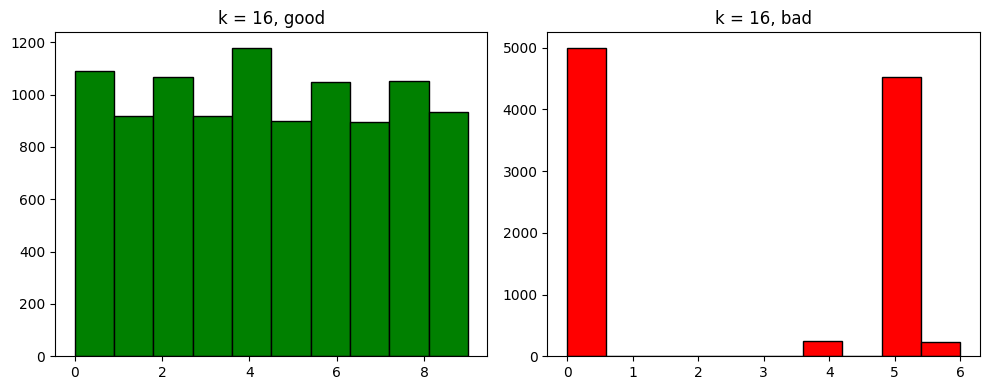

In [43]:
n = 10_000

X = tirages(1, n)
U = np.random.uniform(0, 1, n)

k_list = [10, 12, 14, 16]

for k in k_list:

    l1 = [kth(x, k) for x in X]
    l2 = [kth(u, k) for u in U]

    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    axs[0].hist(l2, bins=10, color='green', edgecolor='black')
    axs[0].set_title(f"k = {k}, good")

    axs[1].hist(l1, bins=10, color='red', edgecolor='black')
    axs[1].set_title(f"k = {k}, bad")



    plt.tight_layout()
    plt.show()



## Exercice 6

Si $U\sim \mathcal{U}([0,~ 1])$ alors $\operatorname{log}(U) \sim \mathcal{E}(1)$ on peut montrer que $-\frac1\lambda \operatorname{log}\left(\frac{U}\lambda\right) \sim \mathcal{E}(\lambda),\quad \, \lambda > 0$.

In [ ]:
def expo(l, n):
    return -1/l * np.log(np.random.uniform(0, 1, n)/l)

## Exercice 7

In [ ]:
def marche_terminal(n):
    steps = np.random.choice([-1, 1], size=(n, 10_000))
    return np.sum(steps, axis=1)


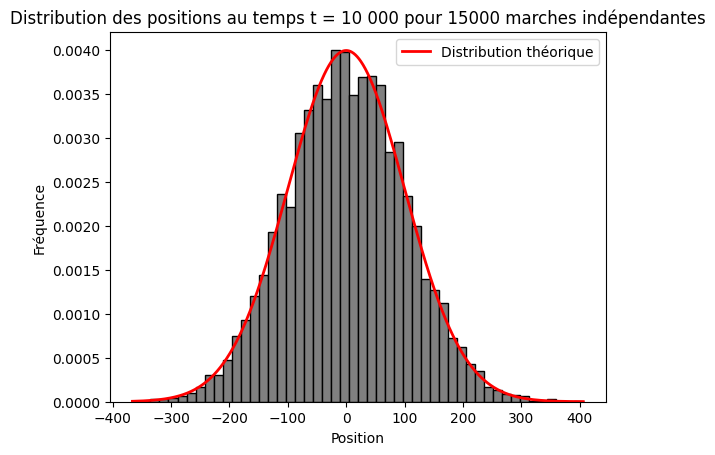

In [ ]:
n = 15_000
positions = marche_terminal(n)

x = np.linspace(min(positions), max(positions), 1000)
pdf = norm.pdf(x, loc=0, scale=np.sqrt(10_000))




plt.hist(positions, bins=50, color='grey', edgecolor='black', density=True)
plt.plot(x, pdf, 'r-', linewidth=2, label='Distribution théorique')

plt.title(f"Distribution des positions au temps t = 10 000 pour {n} marches indépendantes")
plt.xlabel("Position")
plt.ylabel("Fréquence")
plt.legend()
plt.show()


## Exercice 9

On a
\begin{equation*}
v_d = \int_{R^d}\mathbb{1}_{B^d}(x)dx. \end{equation*}

Or
\begin{equation*}
x \notin [-1,~ 1]^d \Rightarrow x\notin B^d.
\end{equation*}

Et donc
\begin{equation*}
\int_{\mathbb{R}^d}\mathbb{1}_{B^d}(x)dx = \int_{[-1,~1]^d}\mathbb{B^d}(x)dx.
\end{equation*}

Aussi, pour $U_1,~\dots,~U_d \sim \mathcal{U}([-1,~1])$ on a
\begin{equation*}
\mathbb{E}\left( \mathbb{1}_{B^d}(U_1,~\dots,~U_d) \right)=\int_{\mathbb{R}^d}\mathbb{1}_{B^d}(x)\frac1{2^d}\mathbb{1}_{[-1,~1]^d}(x)dx=\int_{[-1,~1]^d}\mathbb{1}_{B^d}(x)\frac1{2^d}dx=\frac{v_d}{2^d}.
\end{equation*}
Et donc $v_d = 2^d\mathbb{E}\left( \mathbb{1}_{B^d}(U_1,~\dots,~U_d) \right)$

In [ ]:
def v_d(d, n):
    p = np.mean(np.sum(np.random.uniform(-1, 1, size=(n, d))**2, axis=1) <= 1)
    return 2**d * p, 2**d * 1.96 * np.sqrt(p * (1 - p) / n), np.round(100*p, 2)

In [ ]:
df = pd.DataFrame([[d, *v_d(d, 100_000)] for d in range(1, 21)], columns=["dim", "Volume éstimé", "IC", "Pourcentage"])
df = df.set_index("dim")
df

,Volume éstimé,IC,Pourcentage
dim,,,
1,2.00000,0.000000,100.00
2,3.14000,0.010185,78.50
3,4.19528,0.024763,52.44
4,4.94000,0.045814,30.88
5,5.21248,0.073239,16.29
6,5.14752,0.107879,8.04
7,4.62464,0.148050,3.61
8,4.00640,0.196937,1.57
9,3.18976,0.249697,0.62


On remarque que même pour un grand nombre de simulations, plus la dimension augmente plus la probabilité que les échantillons soient dans la boule est petite. Cela laisse à penser que notre méthode n'est pas adaptée pour les grandes dimensions.

En suivant le même schéma de démonstration, il est clair que l'on a
\begin{equation*}
\mathbb{E}\left( \frac{\mathbb{1}_{B^d}(U_1,~\dots,~U_d)}{\Pi_{i=1}^d f(U_i)} \right) \end{equation*}
avec pour tout $i,~U_i$ a $f$ pour densité.

En suivant cette idée, il nous suffit de prendre $\mathcal{N}(0,~0.51)$ pour avoir une normale dont 95% des valeurs se situent entre -1 et 1.

In [ ]:
def vol_imp(d, n):
    s = np.sqrt(0.1/d)
    U = np.random.normal(0, s, size=(n, d))

    norm_U_sq = np.sum(U**2, axis=1)

    inside = norm_U_sq <= 1
    weights = (np.sqrt(2 * np.pi) * s)**d * np.exp(norm_U_sq / (2 * s**2))
    X = weights * inside

    return np.mean(X), 1.96 * np.std(X)/np.sqrt(n), np.round(np.mean(inside) * 100, 2)

In [ ]:
df = pd.DataFrame([[d, *vol_imp(d, 100_000)] for d in range(1, 21)], columns=["dim", "Volume éstimé", "IC", "Pourcentage"])
df = df.set_index("dim")
df

,Volume éstimé,IC,Pourcentage
dim,,,
1,1.986159e+00,2.867765e-02,99.85
2,3.185625e+00,3.100512e-01,100.00
3,5.814976e+00,3.676712e+00,100.00
4,1.083607e+01,1.601800e+01,100.00
5,3.177305e+00,1.833318e+00,100.00
6,7.111959e-01,1.689327e-01,100.00
7,4.252262e-01,2.108969e-01,100.00
8,8.241605e-01,1.225322e+00,100.00
9,1.247507e-01,6.159891e-02,100.00
